# Quadratic finite elements in 1D

We want to calculate the element stiffness matrices for the model problem
$$
-u''(x) = f(x) \, , \quad \text{in } \Omega
$$

In [1]:
from sympy import *
init_printing()

In [2]:
a, b, c, xi, h_K = symbols('a, b, c, xi, h_K')

Let $\hat K = (-1,1)$ be the reference element and $K = (x_{j-1}, x_j)$ an arbitrary element. We consider the space
$$
V_h = \left\{v \in C^0(\Omega) \; | \; v(x) = a + bx + cx^2 \text{ in } K \; , v_{|\partial \Omega} = 0 \right\} \; .
$$

On the reference element $\hat K$, the three basis function $N_0$, $N_1$ and $N_2$ are polynomials of degree 2, satisfying the following properties:
$$
\begin{align*}
&N_0(-1) = 1 \; , \quad &N_0\left(0\right) = 0 \; , \quad &N_0(1) = 0 \; , \\
&N_1(-1) = 0 \; , \quad &N_1\left(0\right) = 1 \; , \quad &N_1(1) = 0 \; , \\
&N_2(-1) = 0 \; , \quad &N_2\left(0\right) = 0 \; , \quad &N_2(1) = 1 \; . \\
\end{align*}
$$
Let us calculate these polynomials.

In [3]:
coeff = linsolve([a - b + c - 1, a, a + b + c], (a, b, c))
pcs = coeff.args[0]
N0 = pcs[0] + pcs[1]*xi + pcs[2]*xi**2

coeff = linsolve([a - b + c, a - 1, a + b + c], (a, b, c))
pcs = coeff.args[0]
N1 = pcs[0] + pcs[1]*xi + pcs[2]*xi**2

coeff = linsolve([a - b + c, a, a + b + c - 1], (a, b, c))
pcs = coeff.args[0]
N2 = pcs[0] + pcs[1]*xi + pcs[2]*xi**2

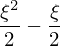

In [4]:
N0

In [5]:
N1

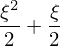

In [6]:
N2

To calculate the element stiffness matrices, we will need the derivates of these polynomials:

In [7]:
N0_diff = diff(N0, xi)
N1_diff = diff(N1, xi)
N2_diff = diff(N2, xi)
diffs = (N0_diff, N1_diff, N2_diff)

The entries of the element stiffness matrix of a element $K$ are now given by the formula
$$
(A_K)_{i,j} = \frac{2}{h_K} \int_{\hat K} N_i'(\xi) N_j'(\xi) \; \mathrm d\xi \; .
$$

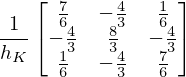

In [8]:
rows = []
for c in range(3):
    row = []
    for r in range(3):
        row.append(1/h_K * integrate(diffs[c]*diffs[r], (xi, -1, 1)))
    rows.append(row)
A_K = Matrix(rows)
g = gcd(tuple(A_K))
MatMul(g, A_K/g, evaluate=False)

The element load vectors are given by the formula
$$
(\ell_K)_i = \frac{h_K}{2} \int_{\hat K} f(F_K(\xi)) \cdot N_i(\xi) \; \mathrm d\xi \; .
$$
In general, we need numerical integration to solve these integrals.